### Import Relevant Libraries

In [1]:
import inspect
from pprint import pprint
from os.path import dirname
from CybORG import CybORG
from CybORG.Agents.Wrappers import *
from CybORG.Simulator.Scenarios import FileReaderScenarioGenerator
from CybORG.Agents.Wrappers.OpenAIGymWrapper import OpenAIGymWrapper
from CybORG.Agents.Wrappers.FixedFlatWrapper import FixedFlatWrapper
from CybORG.Agents import B_lineAgent
from gym import Space
import torch.optim as optim
import torch
import torch as T
import numpy as np
import collections
from collections import namedtuple
import matplotlib.pyplot as plt
from CybORG.Agents.CustomCode.A2C import A2C
from CybORG.Agents.CustomCode.DeepQNetwork import DQN_Agent
from CybORG.Agents.CustomCode.CustomWrapper import CustomWrapper

### Observation of the environement

#### Observation without wrapper

In [2]:
scenario = "scenario1b"
agent_name = 'Blue'
path = str(inspect.getfile(CybORG))
path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
sg = FileReaderScenarioGenerator(path)
cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})

result = cyborg.reset()
observation = result.observation
pprint(observation)
print(f'Length of Observation: {len(observation)}')


{'Defender': {'Interface': [{'IP Address': IPv4Address('10.0.86.197'),
                             'Interface Name': 'eth0',
                             'Subnet': IPv4Network('10.0.86.192/28')}],
              'Processes': [{'Known Path': <Path.SBIN: 6>,
                             'Known Process': <ProcessName.INIT: 3>,
                             'PID': 1,
                             'PPID': 0,
                             'Path': '/sbin',
                             'Process Name': 'init',
                             'Process Type': <ProcessType.UNKNOWN: 1>,
                             'Username': 'root'},
                            {'Known Path': <Path.UNKNOWN: 1>,
                             'Known Process': <ProcessName.UNKNOWN: 1>,
                             'PID': 389,
                             'PPID': 1,
                             'Path': '/lib/systemd',
                             'Process Name': 'systemd-journald',
                             'Process Type

c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\gym\utils\seeding.py:48: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "


#### Observation with FixedFlatWrapper

In [3]:
scenario = "scenario1b"
agent_name = 'Blue'
path = str(inspect.getfile(CybORG))
path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
sg = FileReaderScenarioGenerator(path)
cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))
observation = cyborg.reset()
pprint(observation)
print(f'Length of Observation: {len(observation)}')


array([ 0.6666667,  0.       ,  1.       , ..., -1.       , -1.       ,
       -1.       ], dtype=float32)
Length of Observation: 11293


### Actions available

In [2]:
scenario = "scenario1b"
agent_name = 'Blue'
path = str(inspect.getfile(CybORG))
path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
sg = FileReaderScenarioGenerator(path)
cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})

results = cyborg.reset('Blue')
actions = results.action_space['action']

pprint([action.__name__ for action in actions if actions[action]])
print(f"Number of actions: {len(actions)}")

['Sleep', 'Monitor', 'Analyse', 'Remove', 'Restore']
Number of actions: 5


c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\gym\utils\seeding.py:48: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  "Function `rng.randint(low, [high, size, dtype])` is marked as deprecated "


#### Actions available when using FixedFlatWrapper

In [3]:
scenario = "scenario1b"
agent_name = 'Blue'
path = str(inspect.getfile(CybORG))
path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
sg = FileReaderScenarioGenerator(path)
cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))
observation = cyborg.reset()
print(cyborg.action_space)

Discrete(50)


### Sleep agent

In [21]:
from CybORG.Agents.SimpleAgents.BaseAgent import BaseAgent
from CybORG.Shared import Results
from CybORG.Simulator.Actions import Sleep, GreenPingSweep, GreenPortScan, GreenConnection

class SleepAgent(BaseAgent):
    def __init__(self, np_random=None):
        super().__init__(np_random)
        self.action_space = [
                Sleep
                ]
    def get_action(self):
        return 0

    def train(self,results):
        pass

    def end_episode(self):
        pass

    def set_initial_values(self,action_space,observation):
        pass

MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
sleep_reward_list = []

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))

    observation = cyborg.reset()
    agent = SleepAgent()

    for i in range(MAX_EPS): 
        reward = 0
        for j in range(MAX_STEPS_PER_GAME):
            action = agent.get_action()
            next_observation, r, done, info = cyborg.step(action)
            observation = next_observation
        if i % 20 == 0:
            G = np.zeros(3)
            for j in range(3):
                observation = cyborg.reset()
                rewards = []
                for k in range(50):
                    action = agent.get_action()
                    next_observation, reward, done, info = cyborg.step(action)
                    rewards.append(reward)
                G[j] = np.sum(rewards)
            reward_mean = G.mean()
            print(f"The test reward for episode {i} is {reward_mean}")
            sleep_reward_list.append(reward_mean)

run_training_example('scenario1b')

The test reward for episode 0 is -415.40000000000003
The test reward for episode 20 is -443.3333333333333
The test reward for episode 40 is -470.40000000000003
The test reward for episode 60 is -487.36666666666673
The test reward for episode 80 is -450.06666666666666
The test reward for episode 100 is -468.06666666666666
The test reward for episode 120 is -395.36666666666673
The test reward for episode 140 is -447.70000000000005
The test reward for episode 160 is -467.76666666666665
The test reward for episode 180 is -488.03333333333336
The test reward for episode 200 is -463.70000000000005
The test reward for episode 220 is -470.70000000000005
The test reward for episode 240 is -463.36666666666673
The test reward for episode 260 is -450.70000000000005
The test reward for episode 280 is -428.4666666666667
The test reward for episode 300 is -487.70000000000005
The test reward for episode 320 is -432.70000000000005
The test reward for episode 340 is -430.06666666666666
The test reward fo

### DeepQNetwork Agent

In [4]:
MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
num_episodes_test = 3

reward_list_dqn = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))
    
    state = cyborg.reset()
    action_space = cyborg.action_space
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = DQN_Agent(cyborg, input_dims, output_dims, action_space, lr=5e-4)

    for episode in range(MAX_EPS):
        state = cyborg.reset()
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0
        Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

        for step in range(MAX_STEPS_PER_GAME): 
            action = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                state_ = state
                done = False
                rew = -0.1
            finally: 
                ep_reward += rew
                rew = T.tensor([rew])

                if done:
                    state_ = None
                else:
                    state_ = T.tensor(state_, dtype=torch.float32).unsqueeze(0)

                # Store the new experience
                transition = Transition(state, action, state_, rew)
                agent.store_transition(transition)

                # Move to the next state
                state = state_

                if done:
                    break
            
        agent.train()

        # Evaluate the agent every 20 episodes during training
        if episode % 20 == 0:
            print("Episode: {}".format(episode))

            # Evaluate the agent's performance over 3 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test()
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_list_dqn.append(reward_mean)


run_training_example('scenario1b')

Episode: 0
The test reward for episode 0 is -447.36666666666673 with a standard deviation of 56.334319517995034.
Episode: 20
The test reward for episode 20 is -468.03333333333336 with a standard deviation of 28.522895287041873.
Episode: 40
The test reward for episode 40 is -443.3333333333333 with a standard deviation of 31.82455376312797.
Episode: 60
The test reward for episode 60 is -501.36666666666673 with a standard deviation of 50.6776303927307.
Episode: 80
The test reward for episode 80 is -447.36666666666673 with a standard deviation of 56.334319517995034.
Episode: 100
The test reward for episode 100 is -450.03333333333336 with a standard deviation of 26.132142830026186.
Episode: 120
The test reward for episode 120 is -467.03333333333336 with a standard deviation of 28.522895287041873.
Episode: 140
The test reward for episode 140 is -154.4 with a standard deviation of 3.0626785662227123.
Episode: 160
The test reward for episode 160 is -101.36666666666666 with a standard deviation

Text(0.5, 1.0, 'Test rewards for DeepQNetwork agent')

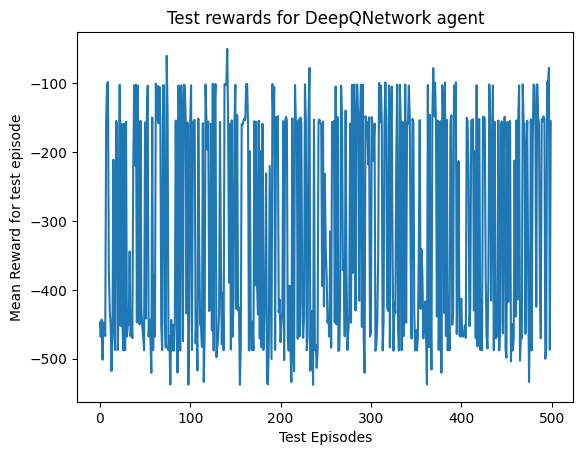

In [5]:
plt.plot(reward_list_dqn)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for DeepQNetwork agent")

### Advantage Actor Critic Agent

In [6]:
MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
num_episodes_test = 3

reward_list_a2c = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))

    state = cyborg.reset()
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = A2C(cyborg, input_dims, output_dims)

    for episode in range(MAX_EPS): 
        state = cyborg.reset()
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0
        
        for step in range(MAX_STEPS_PER_GAME):
            action, log_prob = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                rew = -0.1
                state_ = state
                done = False
            finally:  
                ep_reward += rew
                rew = T.tensor([rew])

                if done:
                    state_ = None
                else:
                    state_ = T.tensor(state_, dtype=torch.float32).unsqueeze(0)

                agent.train(log_prob,state,state_,rew,done)
                # Move to the next state
                state = state_

                if done:
                    break
        
        # Evaluate the agent every 20 episodes during training
        if episode % 20 == 0:
            print("Episode: {}".format(episode))

            # Evaluate the agent's performance over 20 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test()
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_list_a2c.append(reward_mean)


run_training_example('scenario1b')

c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Episode: 0
The test reward for episode 0 is -464.9666666666667 with a standard deviation of 40.781885957152845.
Episode: 20
The test reward for episode 20 is -196.70000000000005 with a standard deviation of 107.58252646224668.
Episode: 40
The test reward for episode 40 is -487.76666666666665 with a standard deviation of 0.04714045207908709.
Episode: 60
The test reward for episode 60 is -487.40000000000003 with a standard deviation of 0.49665548085836886.
Episode: 80
The test reward for episode 80 is -448.40000000000003 with a standard deviation of 28.570030918195833.
Episode: 100
The test reward for episode 100 is -467.70000000000005 with a standard deviation of 27.58018612458347.
Episode: 120
The test reward for episode 120 is -488.03333333333336 with a standard deviation of 0.9428090415820634.
Episode: 140
The test reward for episode 140 is -411.4000000000001 with a standard deviation of 23.122427784873.
Episode: 160
The test reward for episode 160 is -467.7666666666667 with a standa

Text(0.5, 1.0, 'Test rewards for A2C agent')

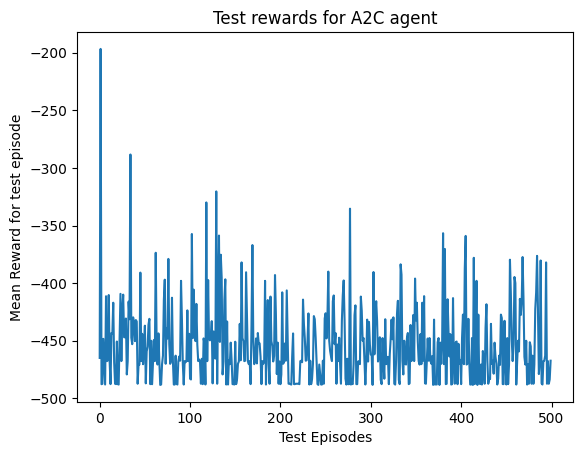

In [7]:
plt.plot(reward_list_a2c)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for A2C agent")

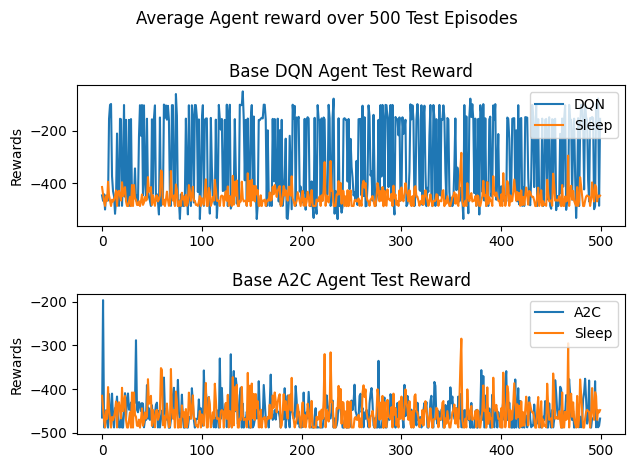

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
fig.suptitle('Average Agent reward over 500 Test Episodes')
l1 = axs[0].plot([i for i in range(len(reward_list_dqn))],reward_list_dqn, label="DQN")
l2 = axs[0].plot([i for i in range(len(sleep_reward_list))],sleep_reward_list, label="Sleep")
axs[0].set_title('Base DQN Agent Test Reward')
l3 = axs[1].plot([i for i in range(len(reward_list_a2c))],reward_list_a2c, label="A2C")
l4 = axs[1].plot([i for i in range(len(sleep_reward_list))],sleep_reward_list, label="Sleep")
axs[1].set_title('Base A2C Agent Test Reward')
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
fig.tight_layout(pad=1.6)

for ax in axs.flat:
    ax.set(ylabel='Rewards')

### AutoEncoder

In [8]:
import inspect
from pprint import pprint
from os.path import dirname
from CybORG import CybORG
from CybORG.Agents.Wrappers import *
from CybORG.Simulator.Scenarios import FileReaderScenarioGenerator
from CybORG.Agents.Wrappers.OpenAIGymWrapper import OpenAIGymWrapper
from CybORG.Agents.Wrappers.FixedFlatWrapper import FixedFlatWrapper
from CybORG.Agents import B_lineAgent
from gym import Space
import torch.optim as optim
import torch
import numpy as np

In [9]:
class AE(torch.nn.Module):
    def __init__(self, input_space):
        super().__init__()

        self.input_dims = input_space
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(self.input_dims, 4096),
            torch.nn.Dropout(0.20),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, 2048),
            torch.nn.Dropout(0.20),
            torch.nn.ReLU(),
            torch.nn.Linear(2048, 1024)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(1024, 2048),
            torch.nn.ReLU(),
            torch.nn.Linear(2048, 4096),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, self.input_dims),
            torch.nn.Tanh()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

#### Collect observation data

In [10]:
MAX_EPS = 20
MAX_STEPS_PER_GAME = 15
observation_list = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))
    
    state = cyborg.reset()
    action_space = cyborg.action_space
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = DQN_Agent(cyborg, input_dims, output_dims, action_space, lr=5e-4)

    for episode in range(MAX_EPS):
        state = cyborg.reset()
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0
        
        for step in range(MAX_STEPS_PER_GAME):  
            action = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                rew = -0.1
                
            ep_reward += rew
            rew = T.tensor([rew])

            if done:
                state_ = None
            else:
                state_ = T.tensor(state_, dtype=torch.float32).unsqueeze(0)

            # Store the observation
            observation_list.append(state)
            # Move to the next state
            state = state_

            if done:
                break

run_training_example('scenario1b')

#### Training an AutoEncoder

In [11]:
# Adjust this path for loading and saving
PATH = 'D:\FYP_model\AutoEncoderModel'
LOADING = False

input_dim = len(observation_list[0][0])
model = AE(input_dim)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
total_loss = []
count = 5
min_delta = 10
for i in range(len(observation_list)):
    input = observation_list[i]
    reconstructed = model(input)
    loss = loss_function(reconstructed, input)
    total_loss.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'{i}: {loss}')
    
    # Early Stopping implementation
    if loss >= min_delta:
        count -= 1
        if count < 0:
            print(f"Early Stopped at step {i}")
            break
    else:
        count = 5
        min_delta = loss
torch.save(model.state_dict(), PATH+f'_{i+1}')


<>:2: DeprecationWarning: invalid escape sequence \F


0: 0.9949612617492676
1: 0.02209322899580002
2: 0.013589214533567429
3: 0.009250144474208355
4: 0.008894398808479309
5: 0.008894398808479309
6: 0.008894398808479309
7: 0.008540197275578976
8: 0.008540197275578976
9: 0.008540188893675804
10: 0.008185994811356068
11: 0.008185994811356068
12: 0.008185994811356068
13: 0.008185994811356068
14: 0.008185994811356068
15: 0.00668108556419611
16: 0.008185994811356068
17: 0.008185994811356068
18: 0.008185994811356068
19: 0.008185994811356068
20: 0.008185994811356068
21: 0.008185994811356068
Early Stopped at step 21


Text(0.5, 1.0, 'Training loss for AutoEncoder')

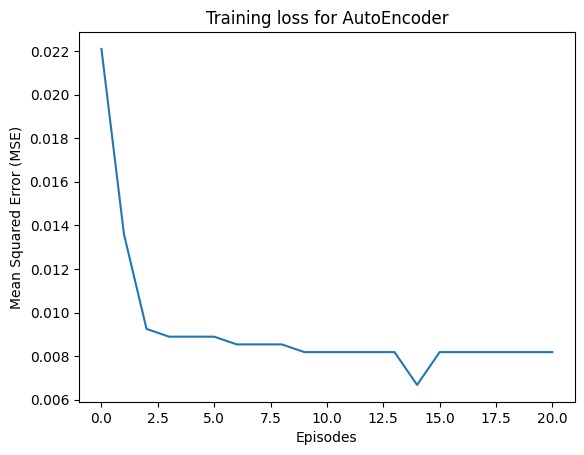

In [22]:
import matplotlib.pyplot as plt
# Converting from list of tensor to list of float
total_loss_float = [tensor.item() for tensor in total_loss]
plt.plot(total_loss_float[1:])
plt.xlabel('Episodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training loss for AutoEncoder')

### AutoEncoder + DeepQNetwork and A2C

#### Loading Pre-trained AutoEncoder

In [13]:
agent_name = 'Blue'
scenario = 'scenario1b'
path = str(inspect.getfile(CybORG))
path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
sg = FileReaderScenarioGenerator(path)
cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
cyborg = OpenAIGymWrapper(agent_name=agent_name,
                            env=FixedFlatWrapper(cyborg))
state = cyborg.reset()
# Load feature extractor
FILE_PATH = 'D:\FYP_model\AutoEncoderModel_11'
print('Loading feature extractor file: ', FILE_PATH)
observation = cyborg.reset()
AutoEncoder = AE(len(state))
AutoEncoder.load_state_dict(torch.load(FILE_PATH))
AutoEncoder.eval()
feature_extractor = AutoEncoder.encoder

Loading feature extractor file:  D:\FYP_model\AutoEncoderModel_11


#### Performing with AE as feature extraction + DeepQNetwork

In [14]:
MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
num_episodes_test = 3

reward_list_dqn_with_AE = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))
    
    state = cyborg.reset()
    state = feature_extractor(T.from_numpy(state))
    action_space = cyborg.action_space
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = DQN_Agent(cyborg, input_dims, output_dims, action_space, lr=5e-4)

    for episode in range(MAX_EPS):  
        state = cyborg.reset()
        state = feature_extractor(T.from_numpy(state))
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0
        Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))
        
        for step in range(MAX_STEPS_PER_GAME): 
            action = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                rew = -0.1
                state_ = state
                done = False
            finally:
                ep_reward += rew
                rew = T.tensor([rew])

                if done:
                    state_ = None
                else:
                    state_ = T.tensor(feature_extractor(T.from_numpy(state_)), dtype=torch.float32).unsqueeze(0)

                # Store the new experience
                transition = Transition(state, action, state_, rew)
                agent.store_transition(transition)

                # Move to the next state
                state = state_

                if done:
                    break
        
        agent.train()

        # Evaluate the agent every 20 episodes during training
        if episode % 20 == 0:
            print("Episode: {}".format(episode))

            # Evaluate the agent's performance over 20 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test(modified_state=1, feature_extractor=feature_extractor)
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_list_dqn_with_AE.append(reward_mean)


run_training_example('scenario1b')

c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Episode: 0
The test reward for episode 0 is -487.70000000000005 with a standard deviation of 0.816496580927726.
Episode: 20
The test reward for episode 20 is -517.0333333333334 with a standard deviation of 28.522895287041873.
Episode: 40
The test reward for episode 40 is -392.0 with a standard deviation of 16.063831008407252.
Episode: 60
The test reward for episode 60 is -520.7 with a standard deviation of 24.752104287649296.
Episode: 80
The test reward for episode 80 is -470.36666666666673 with a standard deviation of 24.513035081133648.
Episode: 100
The test reward for episode 100 is -468.36666666666673 with a standard deviation of 28.05153986662566.
Episode: 120
The test reward for episode 120 is -431.36666666666673 with a standard deviation of 44.574531841499905.
Episode: 140
The test reward for episode 140 is -479.6333333333334 with a standard deviation of 6.424086619036906.
Episode: 160
The test reward for episode 160 is -104.0 with a standard deviation of 3.343650699460095.
Epis

Text(0.5, 1.0, 'Test rewards for DeepQNetwork agent With feature extraction')

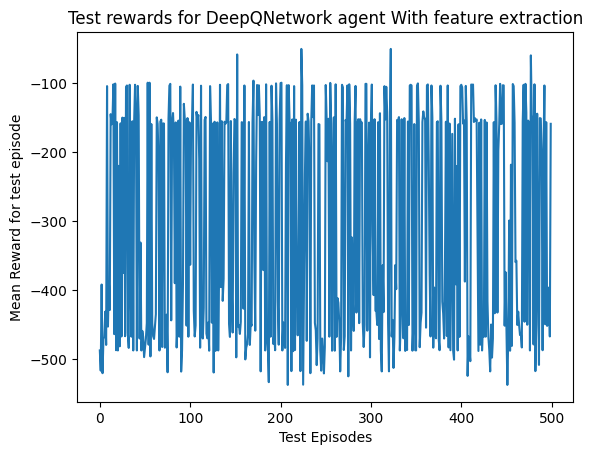

In [23]:
plt.plot(reward_list_dqn_with_AE)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for DeepQNetwork agent With feature extraction")

#### Performing with AE as feature extraction + A2C

In [15]:
MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
num_episodes_test = 3

reward_list_a2c_with_AE = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=FixedFlatWrapper(cyborg))

    state = cyborg.reset()
    state = feature_extractor(T.from_numpy(state))
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = A2C(cyborg, input_dims, output_dims)

    for episode in range(MAX_EPS): 
        state = cyborg.reset()
        state = feature_extractor(T.from_numpy(state))
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0

        for step in range(MAX_STEPS_PER_GAME):
            action, log_prob = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                rew = -0.1
                state_ = state
                done = False
            finally:
                ep_reward += rew
                rew = T.tensor([rew])

                if done:
                    state_ = None
                else:
                    state_ = T.tensor(feature_extractor(T.from_numpy(state_)), dtype=torch.float32).unsqueeze(0)
                    
                agent.train(log_prob,state,state_,rew,done)
                # Move to the next state
                state = state_

                if done:
                    break
        
        # Evaluate the agent every 20 episodes during training
        if episode % 20 == 0:
            print("Episode: {}".format(episode))

            # Evaluate the agent's performance over 20 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test(modified_state=1, feature_extractor=feature_extractor)
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_list_a2c_with_AE.append(reward_mean)


run_training_example('scenario1b')

c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\Users\houzh\anaconda3\envs\fyp_gpu_v2\lib\site-packages\ipykernel_launcher.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Episode: 0
The test reward for episode 0 is -467.70000000000005 with a standard deviation of 28.994252303976847.
Episode: 20
The test reward for episode 20 is -484.0 with a standard deviation of 6.646803743153558.
Episode: 40
The test reward for episode 40 is -450.36666666666673 with a standard deviation of 27.353650985238193.
Episode: 60
The test reward for episode 60 is -454.6000000000001 with a standard deviation of 24.365686254785984.
Episode: 80
The test reward for episode 80 is -467.36666666666673 with a standard deviation of 28.05153986662566.
Episode: 100
The test reward for episode 100 is -488.36666666666673 with a standard deviation of 0.4714045207910317.
Episode: 120
The test reward for episode 120 is -447.7333333333334 with a standard deviation of 28.27370195468259.
Episode: 140
The test reward for episode 140 is -417.9000000000001 with a standard deviation of 65.26520257125283.
Episode: 160
The test reward for episode 160 is -463.70000000000005 with a standard deviation of

Text(0.5, 1.0, 'Test rewards for A2C agent With feature extraction')

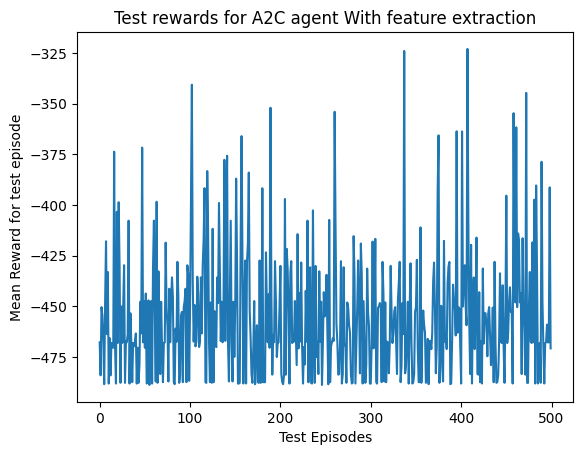

In [24]:
plt.plot(reward_list_a2c_with_AE)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for A2C agent With feature extraction")

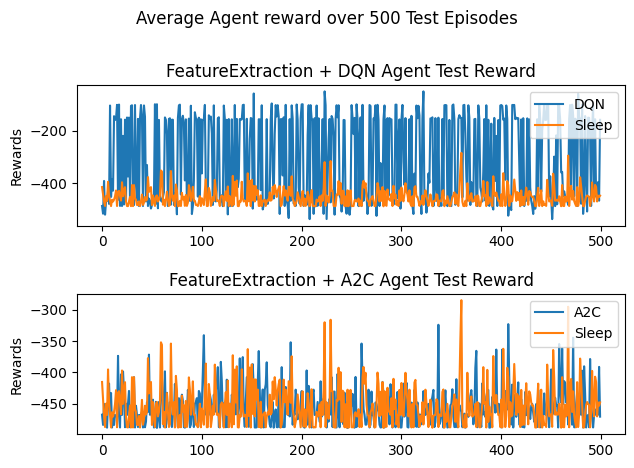

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
fig.suptitle('Average Agent reward over 500 Test Episodes')
l1 = axs[0].plot([i for i in range(len(reward_list_dqn_with_AE))],reward_list_dqn_with_AE, label="DQN")
l2 = axs[0].plot([i for i in range(len(sleep_reward_list))],sleep_reward_list, label="Sleep")
axs[0].set_title('FeatureExtraction + DQN Agent Test Reward')
l3 = axs[1].plot([i for i in range(len(reward_list_a2c_with_AE))],reward_list_a2c_with_AE, label="A2C")
l4 = axs[1].plot([i for i in range(len(sleep_reward_list))],sleep_reward_list, label="Sleep")
axs[1].set_title('FeatureExtraction + A2C Agent Test Reward')
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
fig.tight_layout(pad=1.6)

for ax in axs.flat:
    ax.set(ylabel='Rewards')

### DeepQNetwork Agent with reduced observation space

In [16]:
agent_name = 'Blue'
scenario = 'scenario1b'
path = str(inspect.getfile(CybORG))
path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
sg = FileReaderScenarioGenerator(path)
cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
cyborg = OpenAIGymWrapper(agent_name=agent_name,
                            env=CustomWrapper(cyborg))

action_space = cyborg.action_space
state = cyborg.reset()
print(f'Length of observation with custom wrapper: {len(state)}')

Length of observation with custom wrapper: 52


In [17]:
MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
num_episodes_test = 3

reward_list_dqn_reduced_state = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=CustomWrapper(cyborg))

    state = cyborg.reset()
    action_space = cyborg.action_space
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = DQN_Agent(cyborg, input_dims, output_dims, action_space, lr=5e-4)

    for episode in range(MAX_EPS): 
        state = cyborg.reset()
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0
        Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))
        
        for step in range(MAX_STEPS_PER_GAME):
            action = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                rew = -0.1
                state_ = state
                done = False
                
            ep_reward += rew
            rew = T.tensor([rew])

            if done:
                state_ = None
            else:
                state_ = T.tensor(state_, dtype=torch.float32).unsqueeze(0)

            # Store the new experience
            transition = Transition(state, action, state_, rew)
            agent.store_transition(transition)

            # Move to the next state
            state = state_

            if done:
                break
        
        agent.train()

        # Evaluate the agent every 20 episodes during training
        if episode % 20 == 0:
            print("Episode: {}".format(episode))

            # Evaluate the agent's performance over 20 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test()
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_list_dqn_reduced_state.append(reward_mean)


run_training_example('scenario1b')

Episode: 0
The test reward for episode 0 is -436.03333333333336 with a standard deviation of 42.866718506967096.
Episode: 20
The test reward for episode 20 is -448.4000000000001 with a standard deviation of 56.287180304814214.
Episode: 40
The test reward for episode 40 is -150.33333333333334 with a standard deviation of 6.643459607430117.
Episode: 60
The test reward for episode 60 is -517.7 with a standard deviation of 28.284271247461902.
Episode: 80
The test reward for episode 80 is -421.3 with a standard deviation of 60.145822797597496.
Episode: 100
The test reward for episode 100 is -451.03333333333336 with a standard deviation of 50.44028372464039.
Episode: 120
The test reward for episode 120 is -463.6666666666667 with a standard deviation of 34.69777450436204.
Episode: 140
The test reward for episode 140 is -447.73333333333335 with a standard deviation of 56.59212744621718.
Episode: 160
The test reward for episode 160 is -199.0333333333334 with a standard deviation of 197.75461786

Text(0.5, 1.0, 'Test rewards for DeepQNetwork agent with reduced observation space')

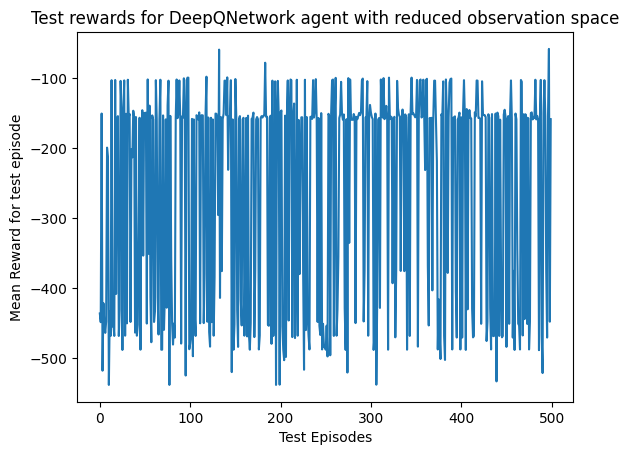

In [18]:
plt.plot(reward_list_dqn_reduced_state)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for DeepQNetwork agent with reduced observation space")

### A2C Agent with reduced observation space

In [19]:
MAX_EPS = 10000
MAX_STEPS_PER_GAME = 50
num_episodes_test = 3

reward_list_a2c_reduced_state = []
torch.manual_seed(44)

def run_training_example(scenario):
    agent_name = 'Blue'
    path = str(inspect.getfile(CybORG))
    path = path[:-7] + f'/Simulator/Scenarios/scenario_files/{scenario}.yaml'
    sg = FileReaderScenarioGenerator(path)
    cyborg = CybORG(scenario_generator=sg,agents={'Red':B_lineAgent()})
    cyborg = OpenAIGymWrapper(agent_name=agent_name,
                              env=CustomWrapper(cyborg))

    state = cyborg.reset()
    input_dims = len(state)
    output_dims = cyborg.action_space.n
    agent = A2C(cyborg, input_dims, output_dims)

    for episode in range(MAX_EPS): 
        state = cyborg.reset()
        state = T.tensor(state, dtype=T.float32).unsqueeze(0)
        done = False
        ep_reward = 0

        for step in range(MAX_STEPS_PER_GAME):  # step in 1 game
            action, log_prob = agent.get_action(state)
            try:
                state_, rew, done, _  = cyborg.step(action.item())
            except:
                rew = -0.1
                state_ = state
                done = False
                
            ep_reward += rew
            rew = T.tensor([rew])

            if done:
                state_ = None
            else:
                state_ = T.tensor(state_, dtype=torch.float32).unsqueeze(0)

            agent.train(log_prob,state,state_,rew,done)
            # Move to the next state
            state = state_

            if done:
                break
        
        # Evaluate the agent every 20 episodes during training
        if episode % 20 == 0:
            print("Episode: {}".format(episode))

            # Evaluate the agent's performance over 20 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test()
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_list_a2c_reduced_state.append(reward_mean)


run_training_example('scenario1b')

Episode: 0
The test reward for episode 0 is -326.6666666666667 with a standard deviation of 153.19208711795645.
Episode: 20
The test reward for episode 20 is -116.26666666666665 with a standard deviation of 20.632714045633673.
Episode: 40
The test reward for episode 40 is -237.96666666666667 with a standard deviation of 182.5840871732498.
Episode: 60
The test reward for episode 60 is -94.33333333333333 with a standard deviation of 5.235986588557652.
Episode: 80
The test reward for episode 80 is -110.36666666666666 with a standard deviation of 5.9066817155564575.
Episode: 100
The test reward for episode 100 is -146.36666666666665 with a standard deviation of 35.49021774454978.
Episode: 120
The test reward for episode 120 is -111.36666666666666 with a standard deviation of 14.974051630144135.
Episode: 140
The test reward for episode 140 is -122.36666666666666 with a standard deviation of 11.08552609887726.
Episode: 160
The test reward for episode 160 is -112.13333333333333 with a standar

Text(0.5, 1.0, 'Test rewards for A2C agent with reduced observation')

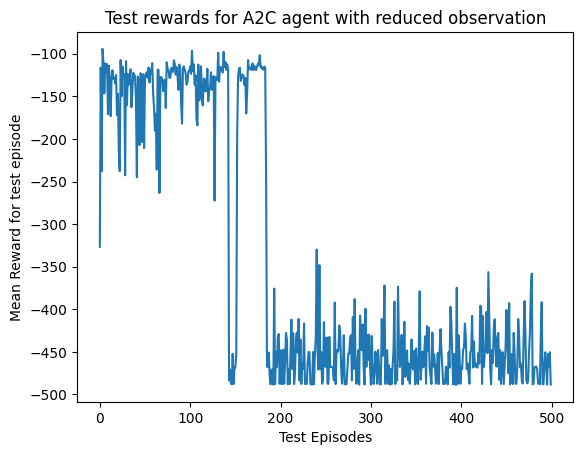

In [20]:
plt.plot(reward_list_a2c_reduced_state)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for A2C agent with reduced observation")

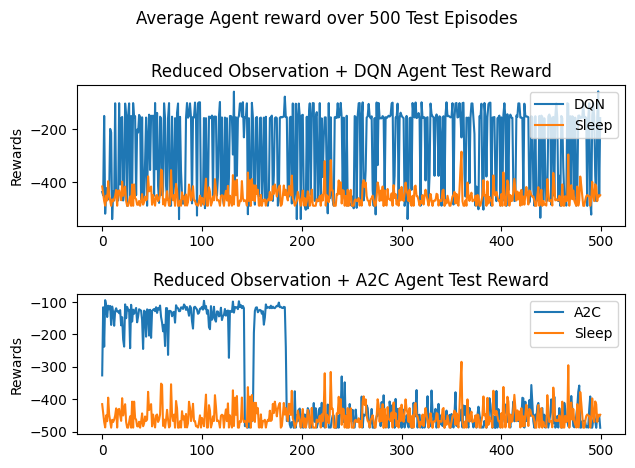

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
fig.suptitle('Average Agent reward over 500 Test Episodes')
l1 = axs[0].plot([i for i in range(len(reward_list_dqn_reduced_state))],reward_list_dqn_reduced_state, label="DQN")
l2 = axs[0].plot([i for i in range(len(sleep_reward_list))],sleep_reward_list, label="Sleep")
axs[0].set_title('Reduced Observation + DQN Agent Test Reward')
l3 = axs[1].plot([i for i in range(len(reward_list_a2c_reduced_state))],reward_list_a2c_reduced_state, label="A2C")
l4 = axs[1].plot([i for i in range(len(sleep_reward_list))],sleep_reward_list, label="Sleep")
axs[1].set_title('Reduced Observation + A2C Agent Test Reward')
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
fig.tight_layout(pad=1.6)

for ax in axs.flat:
    ax.set(ylabel='Rewards')